In [1]:
%matplotlib inline
# Handle table-like data and matrices
import numpy as np
import pandas as pd
import re

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

C:\Users\kefor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
wholedf = pd.read_csv('~/Desktop/PythonLearning/Police_Incident_Log.csv')
wholedf.head(10)
wholedf.tail(10)

,Incident Id,Call Type,Date,Location,Incident Number
28823,159162,Stolen Vehicle,09/18/2013 12:50:00 PM,S Winooski Ave,13BU025009
28824,160945,Trespass,09/21/2013 01:59:00 PM,Pearl St,13BU025379
28825,161280,Noise,09/22/2013 04:09:00 AM,S Union St,13BU025467
28826,164261,Noise,09/27/2013 10:58:00 PM,S Union St/Kingsland Terr,13BU026061
28827,165840,Vandalism,10/01/2013 08:44:00 AM,Lakeside Ave,13BU026395
28828,169204,Domestic Disturbance,10/07/2013 03:26:00 PM,Church St/King St,13BU027107
28829,173283,Ordinance Violation - Other,10/15/2013 05:14:00 PM,Shelburne Rd,13BU027957
28830,177985,Noise,10/25/2013 01:40:00 AM,College St,13BU028878
28831,180001,Larceny - from Building,10/29/2013 02:08:00 PM,N Union St,13BU029253
28832,186525,Larceny - from Building,11/12/2013 02:35:00 PM,N Winooski Ave,13BU030503


In [3]:
# make all location lower case
wholedf.Location = wholedf.Location.str.lower()

# Split it into two parts
wholedf['Street1'], wholedf['Street2'] = wholedf['Location'].str.split('/', 1).str

# Remove trailing spaces from string
wholedf['Street1'] = wholedf.Street1.str.rstrip()
wholedf['Street2'] = wholedf.Street2.str.rstrip()


In [4]:
# Convert Date to datetime value and Split date out into seperate date and time only
wholedf['Date'] = pd.to_datetime(wholedf['Date'])
wholedf['timeonly'],wholedf['dateonly']= wholedf['Date'].apply(lambda x:x.time()), wholedf['Date'].apply(lambda x:x.date())
wholedf.head(5)

,Incident Id,Call Type,Date,Location,Incident Number,Street1,Street2,timeonly,dateonly
0,576,Domestic Disturbance,2011-10-01 19:10:00,park st,11BU023135,park st,NaN,19:10:00,2011-10-01
1,584,Traffic,2011-10-01 20:58:00,s winooski ave/bank st,11BU023143,s winooski ave,bank st,20:58:00,2011-10-01
2,586,Intoxication,2011-10-01 21:13:00,pearl st,11BU023145,pearl st,NaN,21:13:00,2011-10-01
3,587,Noise,2011-10-01 21:25:00,no willard st,11BU023146,no willard st,NaN,21:25:00,2011-10-01
4,591,Noise,2011-10-01 22:03:00,peru st,11BU023150,peru st,NaN,22:03:00,2011-10-01


In [7]:
# Fix some of the spelling mistakes/differences
wholedf['Street1'] = wholedf['Street1'].str.replace("drive","dr")
wholedf['Street1'] = wholedf['Street1'].str.replace("road","rd")
wholedf['Street1'] = wholedf['Street1'].str.replace("rd.","rd")
wholedf['Street1'] = wholedf['Street1'].str.replace("avenue","av")
wholedf['Street1'] = wholedf['Street1'].str.replace("ave.","av")
wholedf['Street1'] = wholedf['Street1'].str.replace("ave","av")
wholedf['Street1'] = wholedf['Street1'].str.replace("parkway","pkwy")
wholedf['Street1'] = wholedf['Street1'].str.replace("street","st")
wholedf['Street1'] = wholedf['Street1'].str.replace("st.","st")
wholedf['Street1'] = wholedf['Street1'].str.replace("heights","hgts")
wholedf['Street1'] = wholedf['Street1'].str.replace(" 1","1")
wholedf['Street1'] = wholedf['Street1'].str.replace("no ","n ")
wholedf['Street1'] = wholedf['Street1'].str.replace(" & mansion st","")
wholedf['Street1'] = wholedf['Street1'].str.replace("st burlington vt 05401","st")
wholedf['Street1'] = wholedf['Street1'].str.replace("n willardst","n willard st")
wholedf['Street1'] = wholedf['Street1'].str.replace("stpaul st","st paul st")
wholedf['Street1'] = wholedf['Street1'].str.replace("colchestr av","colchester av")

In [8]:
wholedf['Location'] = wholedf['Street1']

In [9]:
# Table summary of all the types of violations by type with percentage
countviolationdf = wholedf[['Call Type', 'Date']].groupby(['Call Type'], as_index=False).count().sort_values(by='Date',ascending=0)
countviolationdf.columns = ['Type','Count']
countviolationdf['Total']= countviolationdf['Count'].sum()
countviolationdf['Percentage'] = countviolationdf['Count'] / countviolationdf['Total']
countviolationdf.head(15)

,Type,Count,Total,Percentage
16,Traffic,11747,28833,0.407415
12,Noise,3422,28833,0.118683
8,Intoxication,2640,28833,0.091562
17,Trespass,2616,28833,0.090729
13,Ordinance Violation - Other,1768,28833,0.061319
6,Domestic Disturbance,1429,28833,0.049561
11,Mental Health Issue,1225,28833,0.042486
18,Vandalism,1222,28833,0.042382
4,Burglary,872,28833,0.030243
9,Larceny - from Building,854,28833,0.029619


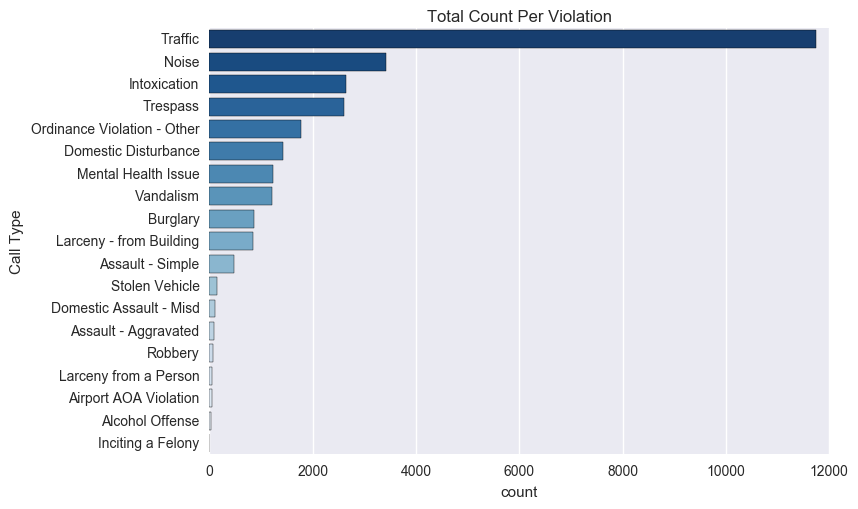

In [10]:
sns.countplot(y="Call Type", data=wholedf, order=countviolationdf['Type'], palette="Blues_r")
plt.title("Total Count Per Violation")
plt.show()

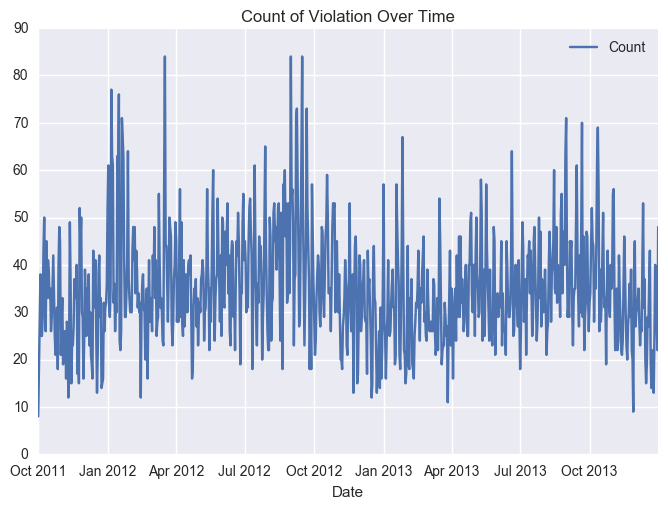

In [11]:
datedf = wholedf[['dateonly', 'Date']].groupby(['dateonly'], as_index=False).count().sort_values(by='dateonly',ascending=0)
datedf = datedf.set_index(datedf.dateonly)
del datedf['dateonly']
datedf.columns = ['Count']

#plot the result
datedf.plot()
plt.title('Count of Violation Over Time')
plt.xlabel('Date')
plt.show()

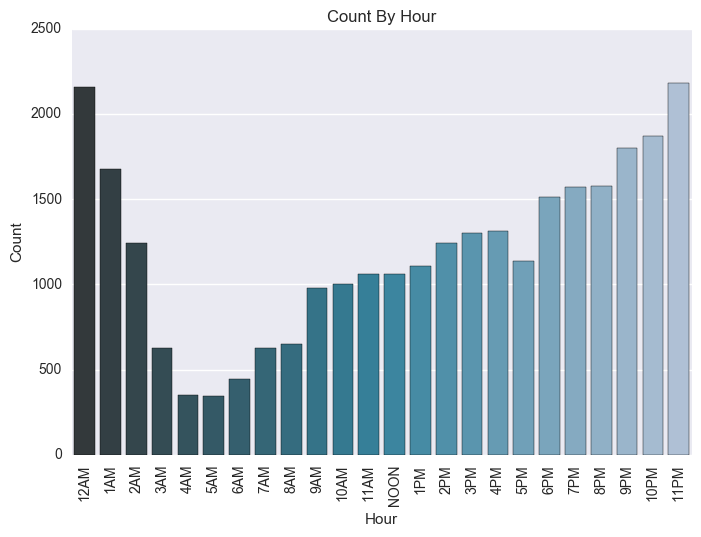

In [12]:
hourdf = wholedf[['timeonly']].groupby(wholedf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

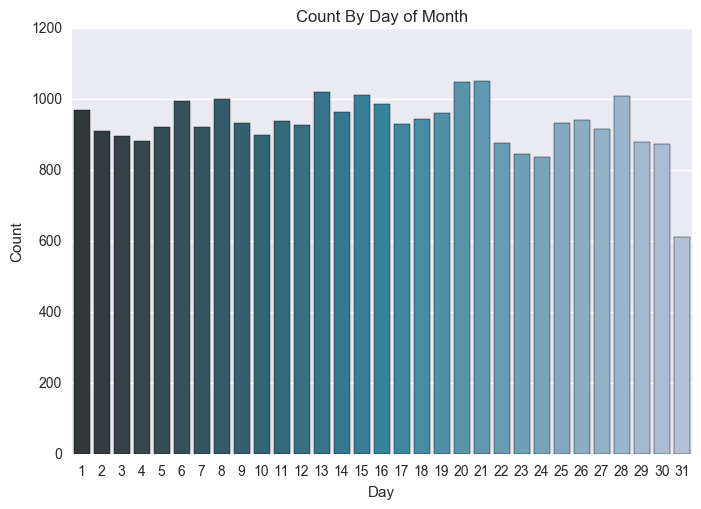

In [13]:
daydf = wholedf[['timeonly']].groupby(wholedf['Date'].dt.day, as_index=False).count()
daydf['Day'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
daydf.columns = ['Count','Day']

sns.barplot(x='Day', y="Count", data=daydf, palette="PuBuGn_d")
plt.title("Count By Day of Month")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

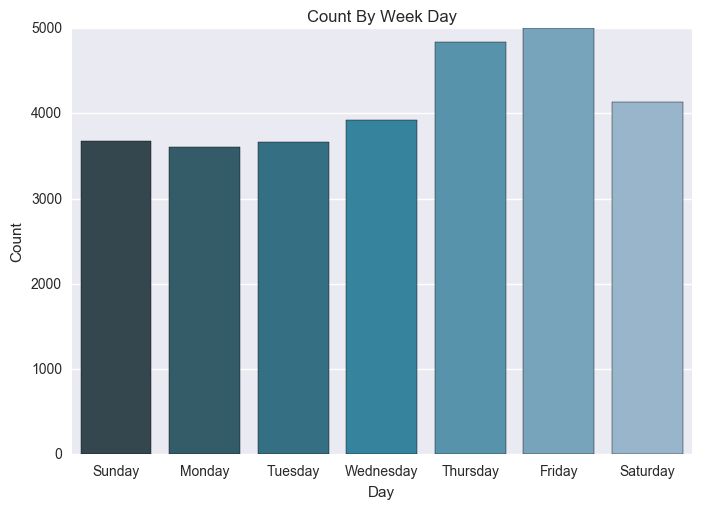

In [14]:
weekdaydf = wholedf[['timeonly']].groupby(wholedf['Date'].dt.weekday, as_index=False).count()
weekdaydf['Day'] = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
weekdaydf.columns = ['Count','Day']

sns.barplot(x='Day', y="Count", data=weekdaydf, palette="PuBuGn_d")
plt.title("Count By Week Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

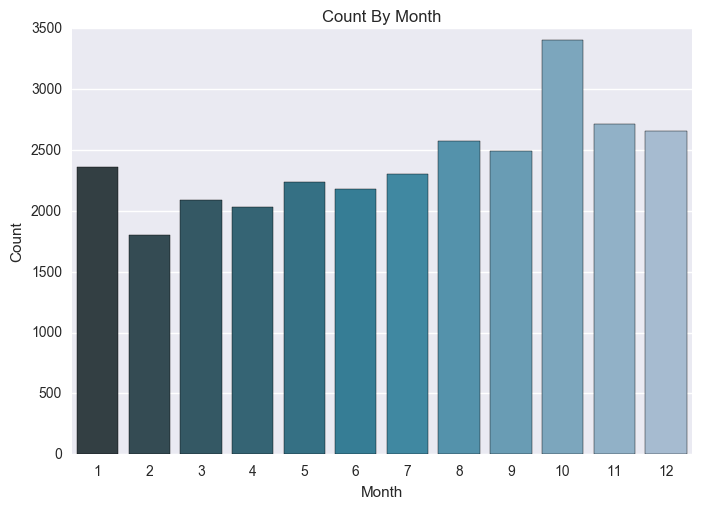

In [15]:

monthdf = wholedf[['timeonly']].groupby(wholedf['Date'].dt.month, as_index=False).count()
monthdf['Month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
monthdf.columns = ['Count','Month']

sns.barplot(x='Month', y="Count", data=monthdf, palette="PuBuGn_d")
plt.title("Count By Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [16]:
# A subdf is used in case perimeters need to be changed
subdf = wholedf
locchurchdf = subdf[(subdf['Location'] == "church st")]
locmaindf = subdf[(subdf['Location'] == "main st")]
loccolchdf = subdf[(subdf['Location'] == "colchester av")]
locpearldf = subdf[(subdf['Location'] == "pearl st")]
locnorthavdf = subdf[(subdf['Location'] == "north av")]
loccollegedf = subdf[(subdf['Location'] == "college st")]
locnwindf = subdf[(subdf['Location'] == "n winooski av")]
locswindf = subdf[(subdf['Location'] == "s winooski av")]
locshelbdf = subdf[(subdf['Location'] == "shelburne rd")]
locnorthstdf = subdf[(subdf['Location'] == "north st")]
locpinestdf = subdf[(subdf['Location'] == "pine st")]
locstpauldf = subdf[(subdf['Location'] == "st paul st")]
locriversidedf = subdf[(subdf['Location'] == "riverside av")]
locsprospectdf = subdf[(subdf['Location'] == "s prospect st")]

In [17]:
calllocdf = wholedf[['Street1', 'Date']].groupby(['Street1'], as_index=False).count().sort_values(by='Date',ascending=0)
calllocdf.columns = ['Type','Count']
calllocdf.head(10)

,Type,Count
393,main st,2265
458,north av,1907
500,pearl st,1663
170,church st,1602
467,north st,1257
188,colchester av,1088
510,pine st,1035
583,s winooski av,989
609,shelburne rd,923
193,college st,909


In [18]:
loctopdf = wholedf[(wholedf['Location'] == "main st") |
                  (wholedf['Location'] == "north av") |
                  (wholedf['Location'] == "pearl st") |
                  (wholedf['Location'] == "church st") |
                  (wholedf['Location'] == "north st") |
                  (wholedf['Location'] == "colchester av") |
                  (wholedf['Location'] == "pine st") | 
                  (wholedf['Location'] == "s winooski av") | 
                  (wholedf['Location'] == "shelburne rd") |
                  (wholedf['Location'] == "college st")]

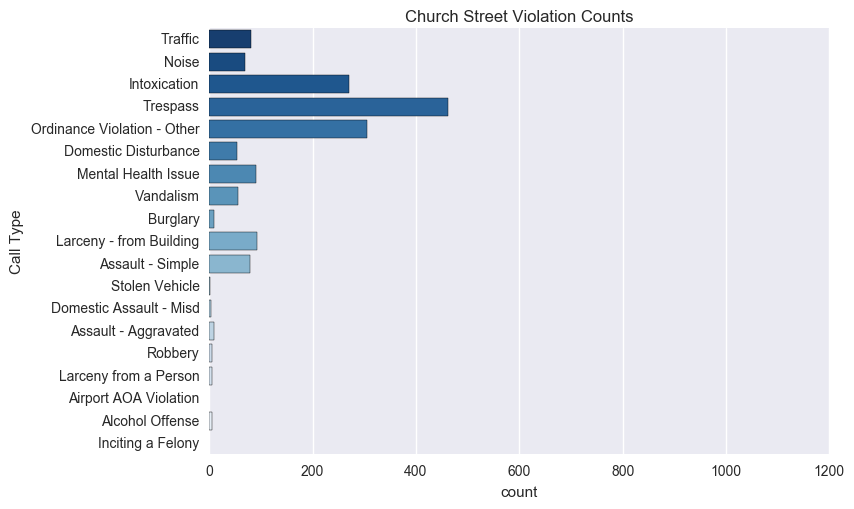

In [19]:
sns.countplot(y="Call Type", data=locchurchdf, order=countviolationdf['Type'], palette="Blues_r")
sns.plt.title('Church Street Violation Counts')
plt.xlim(0,1200)
plt.show()

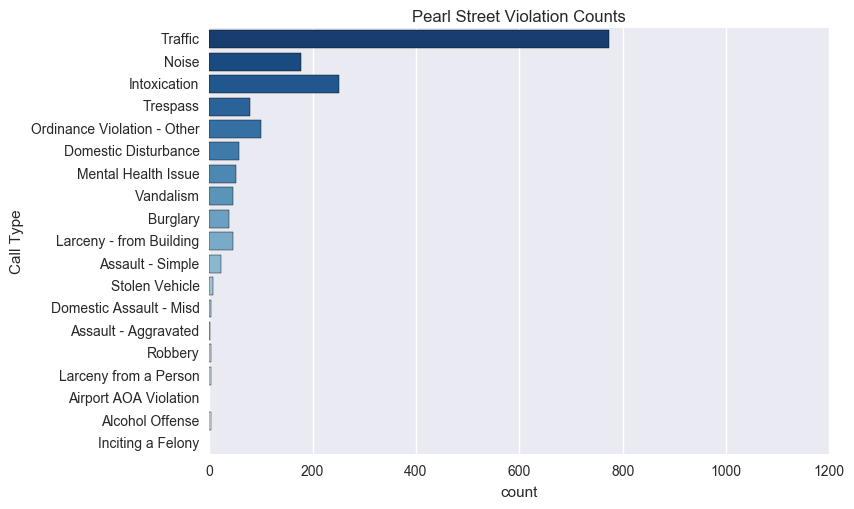

In [20]:
sns.countplot(y="Call Type", data=locpearldf, order=countviolationdf['Type'], palette="Blues_r")
plt.xlim(0,1200)
sns.plt.title('Pearl Street Violation Counts')
plt.show()

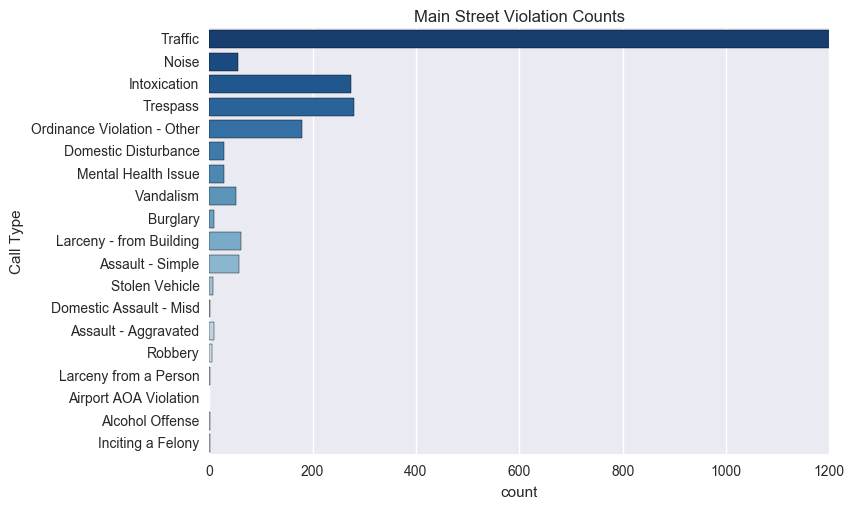

In [21]:
sns.countplot(y="Call Type", data=locmaindf, order=countviolationdf['Type'], palette="Blues_r")
plt.xlim(0,1200)
sns.plt.title('Main Street Violation Counts')
plt.show()

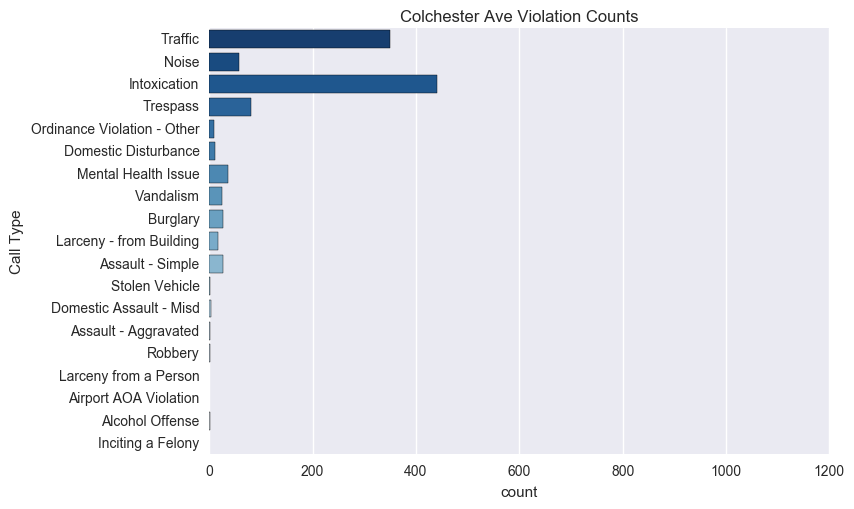

In [22]:
sns.countplot(y="Call Type", data=loccolchdf, order=countviolationdf['Type'], palette="Blues_r")
plt.xlim(0,1200)
sns.plt.title('Colchester Ave Violation Counts')
plt.show()

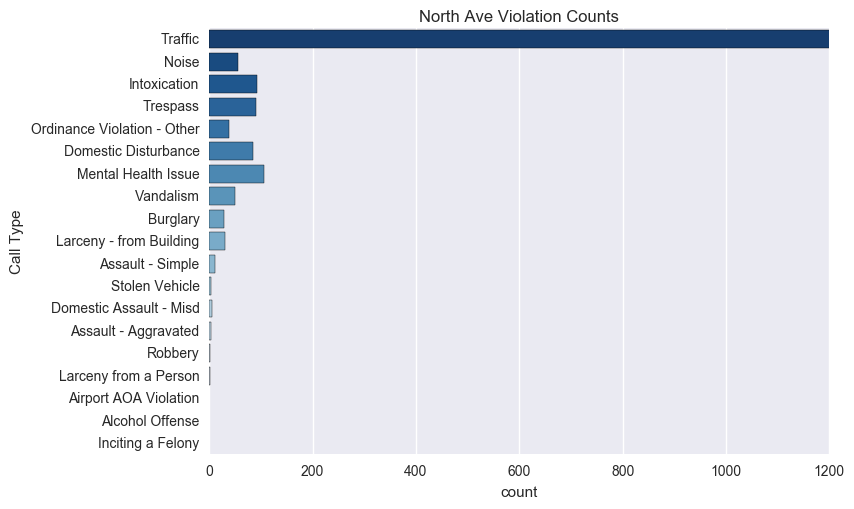

In [23]:
sns.countplot(y="Call Type", data=locnorthavdf, order=countviolationdf['Type'], palette="Blues_r")
plt.xlim(0,1200)
sns.plt.title('North Ave Violation Counts')
plt.show()

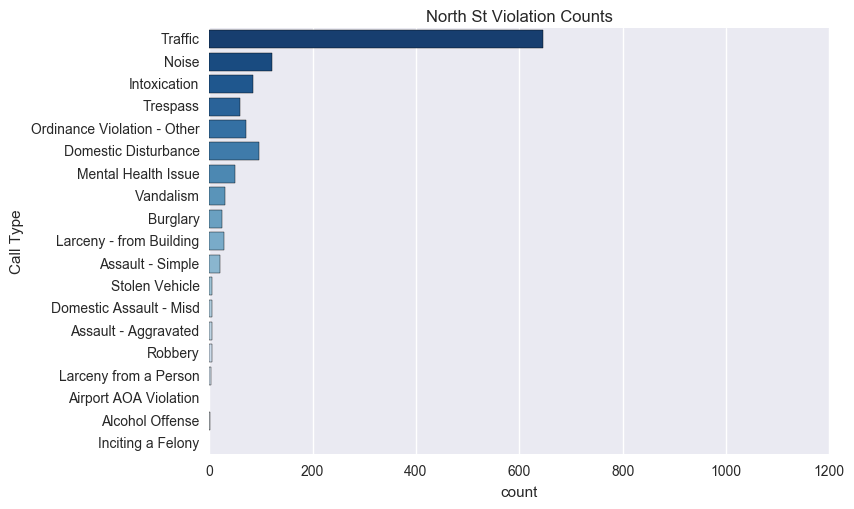

In [24]:
sns.countplot(y="Call Type", data=locnorthstdf, order=countviolationdf['Type'], palette="Blues_r")
plt.xlim(0,1200)
sns.plt.title('North St Violation Counts')
plt.show()

In [25]:
#vsubdf = wholedf[(wholedf['Call Type'] == "Traffic")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Noise")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Intoxication")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Trespass")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Ordinance Violation - Other")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Domestic Disturbance")]
vsubdf = wholedf[(wholedf['Call Type'] == "Mental Health Issue")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Vandalism")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Burglary")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Larceny - from Building")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Assault - Simple")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Stolen Vehicle")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Assault - Aggravated")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Robbery")]
#vsubdf = wholedf[(wholedf['Call Type'] == "Domestic Assault - Misd")]

calllocdf = vsubdf[['Street1', 'Date']].groupby(['Street1'], as_index=False).count().sort_values(by='Date',ascending=0)
calllocdf.columns = ['Street','Count']
calllocdf['Total']= calllocdf['Count'].sum()
calllocdf['Percentage'] = calllocdf['Count'] / calllocdf['Total']
calllocdf.head(10)

,Street,Count,Total,Percentage
100,north av,106,1223,0.086672
36,church st,90,1223,0.073590
114,pine st,79,1223,0.064595
99,n winooski av,53,1223,0.043336
110,pearl st,51,1223,0.041701
103,north st,50,1223,0.040883
142,st paul st,49,1223,0.040065
41,college st,45,1223,0.036795
40,colchester av,37,1223,0.030253
131,s winooski av,34,1223,0.027800


In [26]:
subsetdf = wholedf

countdf = subsetdf.groupby(['Call Type', 'Location']).size().reset_index(name="Count")
countdf = countdf[(countdf['Count'] > 100)]
countdf

#sns.barplot(x="Call Type", y="Count", data=countdf, hue='Location');

,Call Type,Location,Count
725,Intoxication,church st,271
729,Intoxication,colchester av,440
788,Intoxication,main st,275
817,Intoxication,pearl st,251
842,Intoxication,s winooski av,106
1157,Mental Health Issue,north av,106
1257,Noise,buell st,104
1276,Noise,college st,164
1367,Noise,loomis st,101
1393,Noise,n winooski av,126


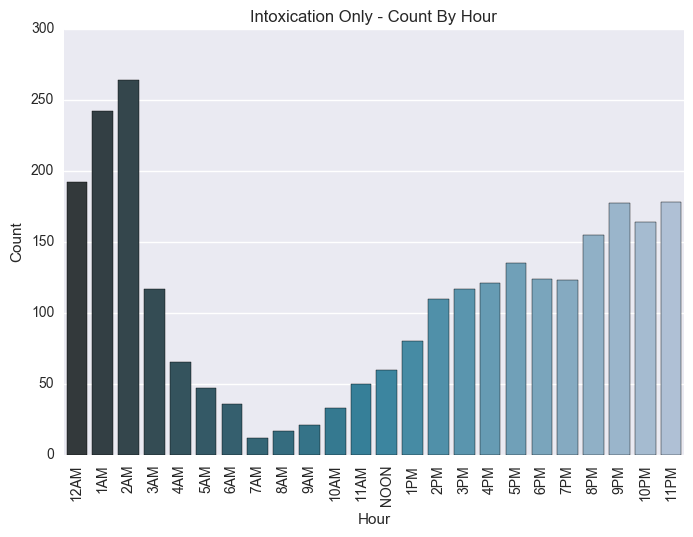

In [27]:
intoxdf = wholedf[(wholedf['Call Type'] == "Intoxication")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Intoxication Only - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

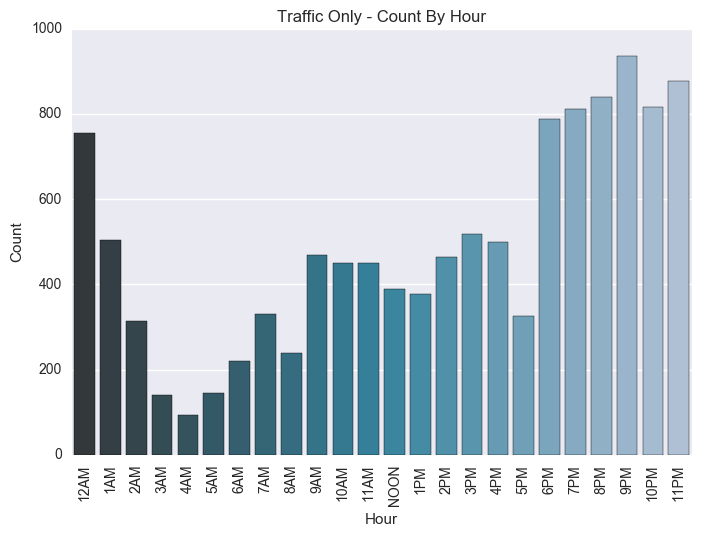

In [28]:
intoxdf = wholedf[(wholedf['Call Type'] == "Traffic")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Traffic Only - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

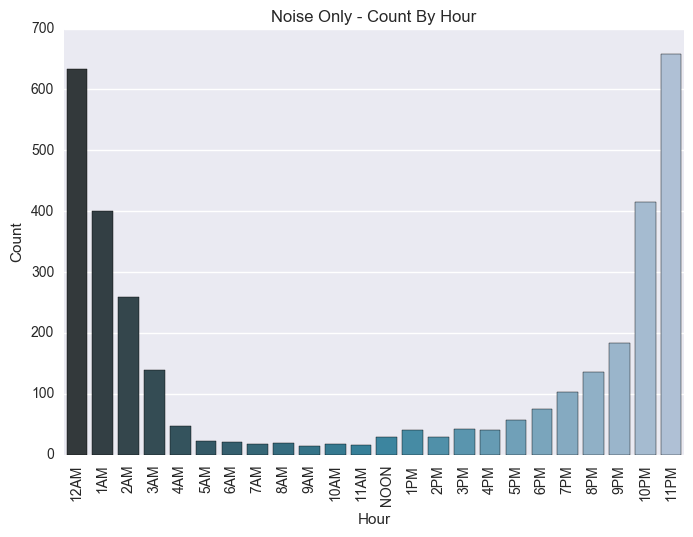

In [29]:
intoxdf = wholedf[(wholedf['Call Type'] == "Noise")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Noise Only - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

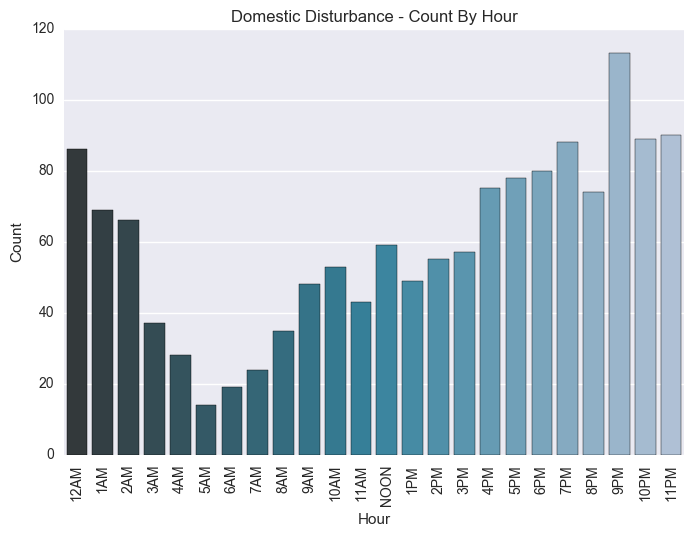

In [30]:
intoxdf = wholedf[(wholedf['Call Type'] == "Domestic Disturbance")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Domestic Disturbance - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

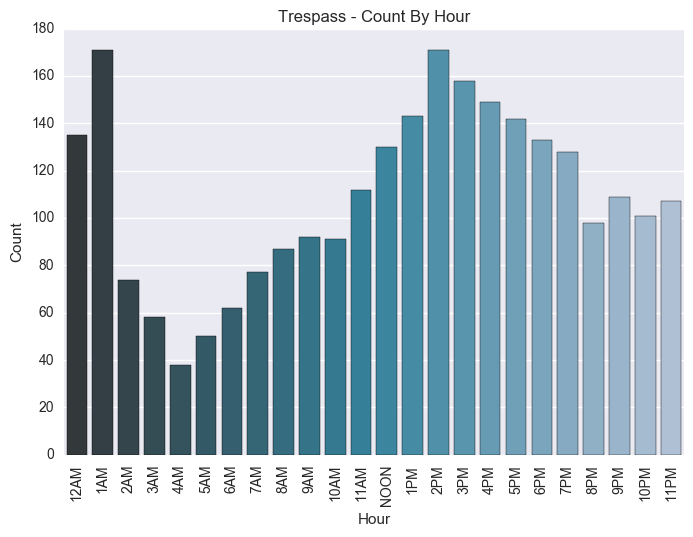

In [31]:
intoxdf = wholedf[(wholedf['Call Type'] == "Trespass")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Trespass - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

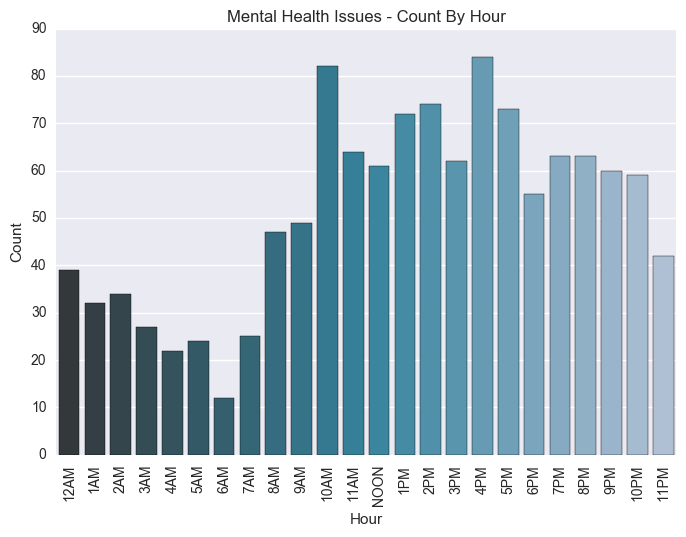

In [32]:
intoxdf = wholedf[(wholedf['Call Type'] == "Mental Health Issue")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Mental Health Issues - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

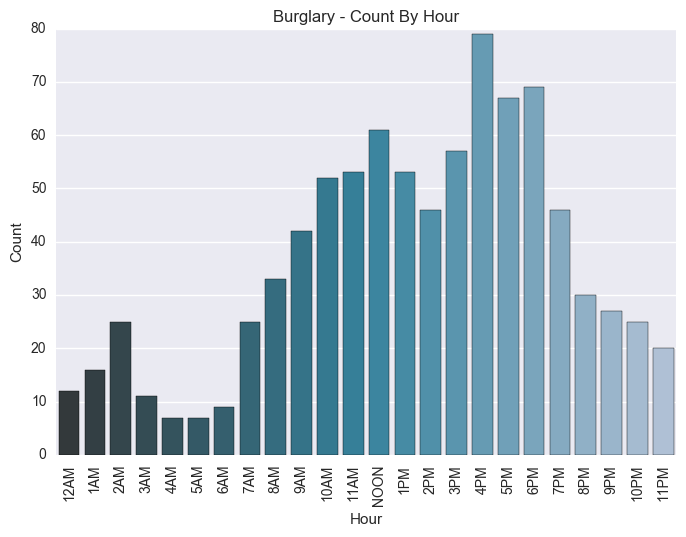

In [33]:
intoxdf = wholedf[(wholedf['Call Type'] == "Burglary")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Burglary - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

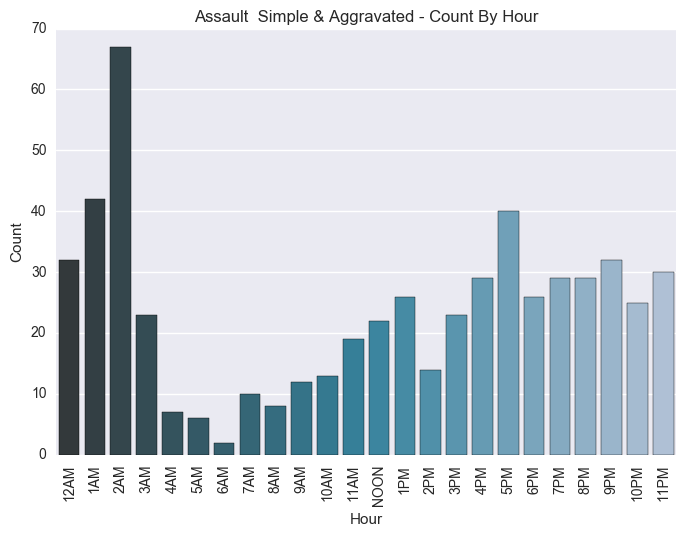

In [34]:
intoxdf = wholedf[(wholedf['Call Type'] == "Assault - Simple") | (wholedf['Call Type'] == "Assault - Aggravated")]

hourdf = intoxdf[['timeonly']].groupby(intoxdf['Date'].dt.hour, as_index=False).count()
hourdf['Hour'] = ["12AM","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","NOON","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM"]
hourdf.columns = ['Count','Hour']
hourdf

sns.barplot(x='Hour', y="Count", data=hourdf, palette="PuBuGn_d")
plt.title("Assault  Simple & Aggravated - Count By Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()